In [51]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
iris = load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [44]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

def score(prediction):
  return adjusted_rand_score(iris.target, prediction)


def predict_and_score(linkage, data):
  model = AgglomerativeClustering(n_clusters=3, linkage=linkage)
  model_pred = model.fit_predict(data)
  model_score = score(model_pred)
  return model_score

In [47]:
model_linkage = ['ward', 'complete', 'average', 'single']
data = iris.data
score_ls = [predict_and_score(l, data) for l in model_linkage ]

print(f"ward : {score_ls[0]}\n"
      f"complete : {score_ls[1]}\n"
      f"average : {score_ls[2]}\n"
      f"single : {score_ls[3]}\n")


ward : 0.7311985567707745
complete : 0.64225125183629
average : 0.7591987071071522
single : 0.5637510205230709



In [45]:
# normalize data for improvement

from sklearn.preprocessing import normalize
norm_x = normalize(iris.data)
norm_x_score = [predict_and_score(l, norm_x) for l in model_linkage]

print(f"ward : {norm_x_score[0]}\n"
      f"complete : {norm_x_score[1]}\n"
      f"average : {norm_x_score[2]}\n"
      f"single : {norm_x_score[3]}\n")



ward : 0.8856970310281228
complete : 0.644447235392006
average : 0.5583714437541352
single : 0.5583714437541352



In [49]:
# visualize the dandogram
from scipy.cluster.hierarchy import linkage

linkage_type = 'ward'
linkage_matrix = linkage(norm_x, linkage_type)
linkage_matrix

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.02000000e+02, 1.11000000e+02, 1.90111713e-03, 2.00000000e+00],
       [0.00000000e+00, 1.00000000e+01, 3.27567062e-03, 2.00000000e+00],
       [5.00000000e+01, 7.40000000e+01, 3.88428902e-03, 2.00000000e+00],
       [6.50000000e+01, 7.10000000e+01, 4.24945677e-03, 2.00000000e+00],
       [1.13000000e+02, 1.32000000e+02, 4.67050611e-03, 2.00000000e+00],
       [3.50000000e+01, 3.60000000e+01, 4.68183801e-03, 2.00000000e+00],
       [5.80000000e+01, 8.00000000e+01, 4.88670468e-03, 2.00000000e+00],
       [1.35000000e+02, 1.46000000e+02, 5.16223015e-03, 2.00000000e+00],
       [2.00000000e+00, 1.52000000e+02, 5.70112468e-03, 3.00000000e+00],
       [7.00000000e+00, 3.80000000e+01, 5.87876302e-03, 2.00000000e+00],
       [2.70000000e+01, 3.90000000e+01, 6.71354429e-03, 2.00000000e+00],
       [9.10000000e+01, 9.40000000e+01, 6.93635227e-03, 2.00000000e+00],
       [1.27000000e+02, 1.38000000e+02, 7.03575776e

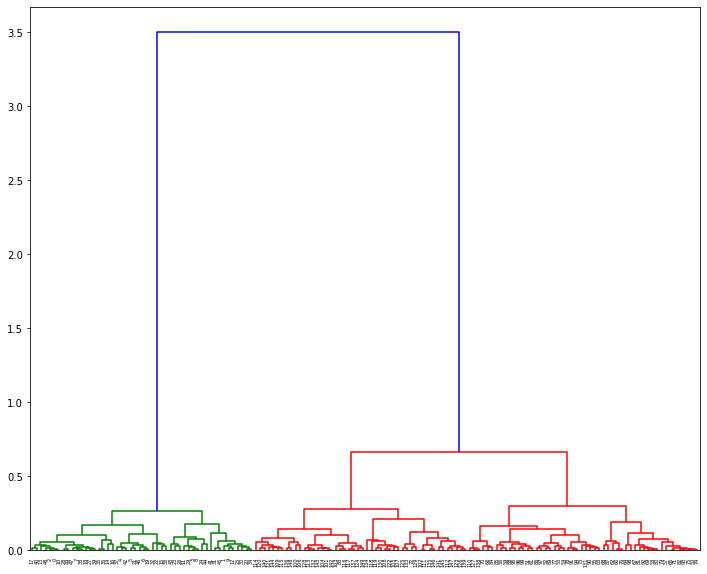

In [54]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(12, 10))
dendrogram(linkage_matrix)
plt.show()

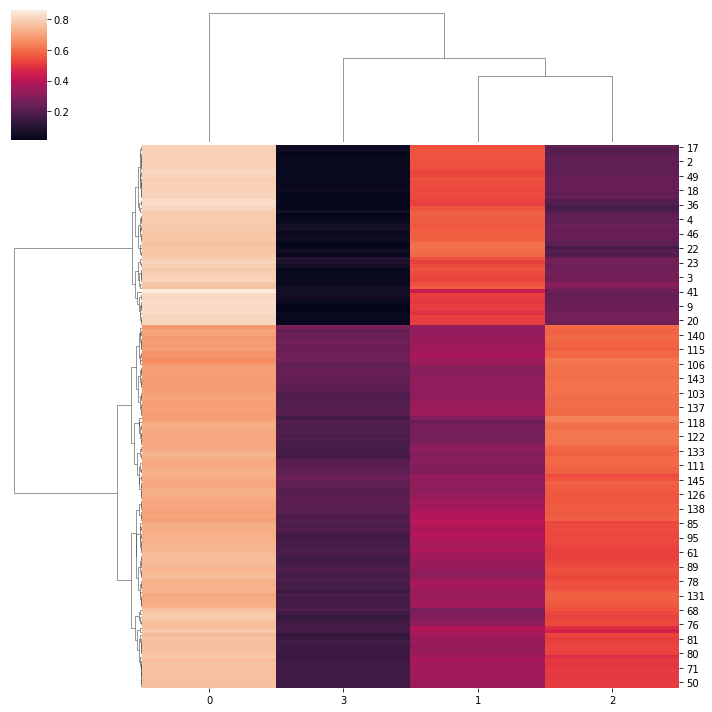

In [55]:
# visualize using seaborn

import seaborn as sns

sns.clustermap(norm_x, method=linkage_type)
plt.show()